# Capstone Webscrapping using BeautifulSoup

Web scraping adalah salah satu metode yang dapat digunakan untuk mengumpulkan data dari internet. Pada modul ini, kita akan mencoba untuk mengambil data tingkat inflasi Indonesia dari pusatdata.kontan.co.id, yang merupakan salah satu pusat data dari surat kabar ekonomi Indonesia yang menyediakan berbagai informasi keuangan yang berguna. Untuk melakukan ini, kita hanya akan menggunakan beberapa pustaka bawaan Python dan BeautifulSoup.

Modul ini dibuat semudah mungkin agar bisa digunakan oleh pengembang pemula untuk belajar cara melakukan web scraping menggunakan Beautiful Soup. Namun, untuk melakukan web scraping, Anda memerlukan sedikit pengetahuan tentang HTML, yang akan kami coba jelaskan apa yang Anda butuhkan dalam modul ini. Namun, lebih baik jika Anda memahami sedikit tentang HTML terlebih dahulu. Anda dapat membaca penjelasannya dengan cepat di dokumentasi BeautifulSoup. Itu menjelaskan apa itu HTML dan apa yang dilakukan BeautifulSoup di halaman utamanya.

## Latar Belakang 
saya memiliki minat dan kebutuhan untuk memahami dan menganalisis perubahan nilai tukar USD terhadap IDR selama tahun 2023. saya ingin mengumpulkan data riwayat nilai tukar ini untuk mendapatkan wawasan tentang fluktuasi mata uang. Dengan memiliki data ini, saya berencana untuk melakukan analisis yang lebih mendalam untuk mengidentifikasi tren, pola, atau peristiwa tertentu yang mungkin memengaruhi nilai tukar selama tahun tersebut.Tujuan utama dari proyek ini adalah mengumpulkan, menyimpan, dan menganalisis data riwayat nilai tukar USD ke IDR selama tahun 2023. Dengan melakukan hal ini, Anda berharap untuk mencapai beberapa tujuan yang lebih spesifik, seperti: Memahami Perubahan Tren: Menganalisis data untuk memahami tren umum dan fluktuasi dalam nilai tukar USD terhadap IDR selama tahun tersebut, mengidentifikasi Puncak dan Lembah: Mengidentifikasi puncak dan lembah nilai tukar yang mungkin menjadi titik fokus perhatian.

## Requesting the Data and Creating a BeautifulSoup

Mari kita mulai dengan meminta data dari situs web menggunakan metode 'get'.

In [72]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

kode ini adalah langkah awal dalam mengakses situs web yang berisi data nilai tukar mata uang dan mengambil informasi yang diperlukan untuk analisis lebih lanjut.

In [73]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

Mengakses konten (data HTML) dari respons HTTP yang diterima dari situs web dan juga Memilih potongan data dari karakter indeks ke-1 hingga ke-500 dari konten tersebut. Ini digunakan untuk menampilkan sebagian dari data HTML sebagai contoh, dalam hal ini karakter ke-1 hingga ke-500.

<!DOCTYPE html>

<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang="en"><!--<![endif]-->
<head>
<title>USD to IDR exchange rate history</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
<meta charset="utf-8"><meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<base href="https://www.exchange-rates.org/"/>
<meta content="This page provides the most accurate information on US Dollar (USD) to Indonesian Rupiah (IDR) exchange rate history.  View complete USD to IDR historical data including charts and tables going back 10 years." name="description"/>
<meta content="" name="keywords"/>
<meta content="https://www.exchange-rates.org/exchange-rate-history/usd-idr" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="US Dollar (USD) To Indonesian Rupiah (IDR)
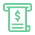
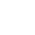
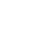

In [74]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
soup

Proses kode ini adalah untuk menguraikan konten HTML yang diterima dari situs web menggunakan pustaka BeautifulSoup

## Mencari kunci yang tepat untuk mengekstrak data & Mengekstrak informasi yang benar


Temukan kunci yang sesuai dan masukkan kunci tersebut ke dalam metode .find(). Lakukan eksplorasi dengan menggunakan kunci yang tepat pada sel ini.Kode ini digunakan untuk mencari tabel dengan atribut class yang bernilai 'history-rates-data' dalam objek BeautifulSoup yang telah dihasilkan sebelumnya, dan kemudian mencetak sebagian dari kode HTML tabel tersebut untuk dianalisis. Jadi, hasil cetakan ini adalah potongan pertama dari kode HTML dalam tabel yang memiliki atribut class yang sesuai.

In [75]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-09-04">
     September 4, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-09-04">
     2023-9-4
    </a>
   </td>
   <td>
    <span class="w">
     <span class=


Finding row length.

In [76]:
row = table.find_all('tr')
row_length = len(row)
row

[<tr>
 <th class="ltr-bidi-fix">Date</th>
 <th class="ltr-bidi-fix">US Dollar to Indonesian Rupiah</th>
 </tr>,
 <tr>
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2023-09-04">September 4, 2023</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2023-09-04">2023-9-4</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,230</span></span>
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,230</span></span>
 </td>
 </tr>,
 <tr class="odd">
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2023-09-01">September 1, 2023</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2023-09-01">2023-9-1</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,258</span

Kode ini digunakan untuk mencari semua elemen baris (<tr>) dalam tabel yang telah ditemukan sebelumnya. Kemudian, kode menghitung jumlah baris yang telah ditemukan dan menyimpannya dalam variabel row_length. Hasilnya adalah daftar dari semua elemen baris dalam tabel.

kode ini merupakan proses scraping data dari tabel yang telah ditemukan sebelumnya. Berikut adalah penjelasan langkah-langkahnya

In [114]:
temp = [] #init


for i in range (1 , row_length):
    
    
    #get Date 
    Date = table.find_all('a', attrs={'class' :'w'})[i].text
    Date = Date.strip() #to remove excess white space
    
    #get Daily_Price
    Daily_Price = table.find_all('span', {'class':'w'})[i].text
    temp.append((Date,Daily_Price)) 
    
temp 




IndexError: list index out of range

Prosesnya dimulai dengan inisialisasi sebuah list kosong yang disebut temp. Selanjutnya, kode menggunakan sebuah loop untuk mengiterasi melalui indeks baris dalam tabel. Pada setiap iterasi, kode mencari dan mengambil data tanggal dan harga harian, kemudian memprosesnya dan menyimpan dalam bentuk pasangan (tanggal, harga harian) dalam list temp. Proses ini dilakukan secara berulang untuk setiap baris dalam tabel sehingga akhirnya list temp berisi data yang telah diambil. Proses scraping ini memungkinkan pengumpulan data historis nilai tukar mata uang dengan mudah dan efisien untuk analisis lebih lanjut.


In [122]:
temp = temp[::-1]
temp

[('March 8, 2023', '$1 = Rp15,449'),
 ('March 9, 2023', '$1 = Rp15,495'),
 ('March 10, 2023', '$1 = Rp15,503'),
 ('March 13, 2023', '$1 = Rp15,416'),
 ('March 14, 2023', '$1 = Rp15,380'),
 ('March 15, 2023', '$1 = Rp15,459'),
 ('March 16, 2023', '$1 = Rp15,429'),
 ('March 17, 2023', '$1 = Rp15,375'),
 ('March 20, 2023', '$1 = Rp15,343'),
 ('March 21, 2023', '$1 = Rp15,301'),
 ('March 22, 2023', '$1 = Rp15,253'),
 ('March 23, 2023', '$1 = Rp15,085'),
 ('March 24, 2023', '$1 = Rp15,165'),
 ('March 27, 2023', '$1 = Rp15,107'),
 ('March 28, 2023', '$1 = Rp15,060'),
 ('March 29, 2023', '$1 = Rp15,034'),
 ('March 30, 2023', '$1 = Rp15,024'),
 ('March 31, 2023', '$1 = Rp14,969'),
 ('April 3, 2023', '$1 = Rp14,922'),
 ('April 4, 2023', '$1 = Rp14,957'),
 ('April 5, 2023', '$1 = Rp14,960'),
 ('April 6, 2023', '$1 = Rp14,931'),
 ('April 7, 2023', '$1 = Rp14,941'),
 ('April 10, 2023', '$1 = Rp14,950'),
 ('April 11, 2023', '$1 = Rp14,915'),
 ('April 12, 2023', '$1 = Rp14,835'),
 ('April 13, 2023',

Kode ini digunakan untuk membalik urutan data dalam list temp. Dengan menggunakan temp[::-1], list temp akan diubah sehingga data yang awalnya terurut dari yang terbaru ke yang terlama akan menjadi terurut dari yang terlama ke yang terbaru. Hasilnya adalah list temp yang berisi data historis nilai tukar mata uang dengan urutan terlama terlebih dahulu.

## Creating data frame & Data wrangling

Put the array into dataframe

In [135]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date', 'Daily_Price'))
df.head()


,Date,Daily_Price
0,"March 8, 2023","$1 = Rp15,449"
1,"March 9, 2023","$1 = Rp15,495"
2,"March 10, 2023","$1 = Rp15,503"
3,"March 13, 2023","$1 = Rp15,416"
4,"March 14, 2023","$1 = Rp15,380"


Kode ini menggunakan pustaka pandas untuk membuat sebuah DataFrame (df) dari list temp yang berisi data tanggal dan harga harian yang telah diambil dari tabel. DataFrame ini memiliki dua kolom, yaitu 'Date' untuk tanggal dan 'Daily_Price' untuk harga harian. Kemudian, kode menggunakan .head() untuk menampilkan lima baris pertama dari DataFrame sebagai contoh. Dengan demikian, Anda dapat dengan mudah memvisualisasikan dan menganalisis data historis nilai tukar mata uang yang telah berhasil diambil dari situs web.


In [149]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df.dtypes

Date    datetime64[ns]
dtype: object

Kode ini mengubah tipe data kolom 'Date' dalam DataFrame df menjadi datetime64[ns], yang merupakan tipe data untuk tanggal dan waktu dalam format datetime dalam pandas. Setelah perubahan ini, kode menggunakan .dtypes untuk menampilkan tipe data dari setiap kolom dalam DataFrame. Hasilnya adalah DataFrame yang memiliki kolom 'Date' dengan tipe data datetime64[ns], yang siap digunakan untuk analisis berdasarkan tanggal.

In [130]:

data = {'Daily_Price': ['$1 = Rp15,449', '$1 = Rp15,495', '$1 = Rp15,503', '$1 = Rp15,416', '$1 = Rp15,380', '$1 = Rp15,459',
  '$1 = Rp15,429', '$1 = Rp15,375', '$1 = Rp15,343', '$1 = Rp15,301', '$1 = Rp15,253', '$1 = Rp15,085', '$1 = Rp15,165',
  '$1 = Rp15,107', '$1 = Rp15,060', '$1 = Rp15,034', '$1 = Rp15,024', '$1 = Rp14,969', '$1 = Rp14,922', '$1 = Rp14,957',
  '$1 = Rp14,960', '$1 = Rp14,931', '$1 = Rp14,941', '$1 = Rp14,950', '$1 = Rp14,915', '$1 = Rp14,835', '$1 = Rp14,722',
  '$1 = Rp14,782', '$1 = Rp14,850', '$1 = Rp14,889', '$1 = Rp14,995', '$1 = Rp14,954', '$1 = Rp14,936', '$1 = Rp14,934',
  '$1 = Rp14,940', '$1 = Rp14,841', '$1 = Rp14,691', '$1 = Rp14,674', '$1 = Rp14,677', '$1 = Rp14,747', '$1 = Rp14,680',
  '$1 = Rp14,699', '$1 = Rp14,675', '$1 = Rp14,744', '$1 = Rp14,776', '$1 = Rp14,698', '$1 = Rp14,776', '$1 = Rp14,844',
  '$1 = Rp14,789', '$1 = Rp14,877', '$1 = Rp14,853', '$1 = Rp14,923', '$1 = Rp14,936', '$1 = Rp14,893', '$1 = Rp14,904',
  '$1 = Rp14,943', '$1 = Rp14,968', '$1 = Rp15,008', '$1 = Rp14,964', '$1 = Rp14,983', '$1 = Rp14,991', '$1 = Rp14,907',
  '$1 = Rp14,902', '$1 = Rp14,855', '$1 = Rp14,871', '$1 = Rp14,889', '$1 = Rp14,842', '$1 = Rp14,889', '$1 = Rp14,872',
  '$1 = Rp14,870', '$1 = Rp14,907', '$1 = Rp14,903', '$1 = Rp14,961', '$1 = Rp15,014', '$1 = Rp15,015', '$1 = Rp14,945',
  '$1 = Rp14,939', '$1 = Rp15,045', '$1 = Rp15,045', '$1 = Rp14,988', '$1 = Rp14,985', '$1 = Rp15,059', '$1 = Rp15,040',
  '$1 = Rp15,063', '$1 = Rp15,020', '$1 = Rp15,078', '$1 = Rp15,178', '$1 = Rp15,162', '$1 = Rp15,187', '$1 = Rp15,140',
  '$1 = Rp14,935', '$1 = Rp14,954', '$1 = Rp15,003', '$1 = Rp14,972', '$1 = Rp14,989', '$1 = Rp15,009', '$1 = Rp15,056',
  '$1 = Rp15,043', '$1 = Rp15,022', '$1 = Rp15,027', '$1 = Rp15,009', '$1 = Rp15,102', '$1 = Rp15,107', '$1 = Rp15,099',
  '$1 = Rp15,121', '$1 = Rp15,227', '$1 = Rp15,148', '$1 = Rp15,153', '$1 = Rp15,225', '$1 = Rp15,212', '$1 = Rp15,214',
  '$1 = Rp15,263', '$1 = Rp15,324', '$1 = Rp15,330', '$1 = Rp15,318', '$1 = Rp15,369', '$1 = Rp15,343', '$1 = Rp15,321',
  '$1 = Rp15,325', '$1 = Rp15,324', '$1 = Rp15,301', '$1 = Rp15,246', '$1 = Rp15,298', '$1 = Rp15,248', '$1 = Rp15,202',
  '$1 = Rp15,223', '$1 = Rp15,225', '$1 = Rp15,258']}
  
df_1 = pd.DataFrame(data)
df_1['Daily_Price'] = df_1['Daily_Price'].str.replace('$1 = Rp', '').str.replace(',', '').astype(float)
print(df_1)


     Daily_Price
0        15449.0
1        15495.0
2        15503.0
3        15416.0
4        15380.0
..           ...
123      15248.0
124      15202.0
125      15223.0
126      15225.0
127      15258.0

[128 rows x 1 columns]


Kode ini membuat DataFrame df_1 dari data yang diberikan. Kemudian, dalam kolom 'Daily_Price', tanda mata uang '$1 = Rp' diganti dengan string kosong ('') dan tanda koma (',') dihapus, sehingga string ini diubah menjadi angka float. Hasilnya adalah DataFrame df_1 dengan kolom 'Daily_Price' yang berisi nilai tukar USD ke IDR dalam format float. Kolom 'Daily_Price' sekarang berisi nilai tukar dalam format float yang siap untuk digunakan dalam analisis lebih lanjut.

In [156]:
result = pd.concat([df, df_1], axis=1)
result.head()
result



,Date,Daily_Price
0,2023-03-08,15449.0
1,2023-03-09,15495.0
2,2023-03-10,15503.0
3,2023-03-13,15416.0
4,2023-03-14,15380.0
...,...,...
123,2023-08-28,15248.0
124,2023-08-29,15202.0
125,2023-08-30,15223.0
126,2023-08-31,15225.0


Kode ini menggabungkan dua DataFrame, yaitu df dan df_1, secara horizontal (dengan menggunakan axis=1). Hasilnya adalah DataFrame baru bernama result yang memiliki semua kolom dari df dan df_1. Namun, jika Anda ingin menggabungkan DataFrame ini dengan benar, Anda harus memastikan bahwa kolom yang digunakan untuk menggabungkan memiliki nama yang sama atau memiliki nilai yang sesuai.

In [174]:
result.index = pd.to_datetime(result.index)
start_date = '2023-03-08'
end_date = '2023-03-31'

result_march= result[start_date:end_date]
result_march


,Daily_Price
Date,
2023-03-08,15449.0
2023-03-09,15495.0
2023-03-10,15503.0
2023-03-13,15416.0
2023-03-14,15380.0
2023-03-15,15459.0
2023-03-16,15429.0
2023-03-17,15375.0
2023-03-20,15343.0


In [189]:
start_date = '2023-04-03'
end_date = '2023-04-28'
result_april= result[start_date:end_date]


start_date = '2023-05-01'
end_date = '2023-05-31'
result_may= result[start_date:end_date]

start_date = '2023-06-01'
end_date = '2023-06-30'
result_june= result[start_date:end_date]

start_date = '2023-07-03'
end_date = '2023-07-31'
result_july= result[start_date:end_date]

start_date = '2023-08-01'
end_date = '2023-08-31'
result_august= result[start_date:end_date]


kode di atas mengubah indeks DataFrame result menjadi tipe data datetime menggunakan pd.to_datetime(result.index). Kemudian, Anda mencoba untuk memfilter DataFrame berdasarkan rentang tanggal dari '2023-03-08' hingga '2023-03-31' dengan menggunakan result[start_date:end_date].

In [199]:
result_april.pivot_table(
    index='Date' ,
    values='Daily_Price',
    aggfunc='mean'
)

,Daily_Price
Date,
2023-04-03,14922.0
2023-04-04,14957.0
2023-04-05,14960.0
2023-04-06,14931.0
2023-04-07,14941.0
2023-04-10,14950.0
2023-04-11,14915.0
2023-04-12,14835.0
2023-04-13,14722.0


saya disini mencoba untuk melakukan visualisasi menggunakan bar horizontal dengan menampilkan data bulan nilai kurs dollar ke rupiah pada bulan maret 

<Axes: ylabel='Date'>

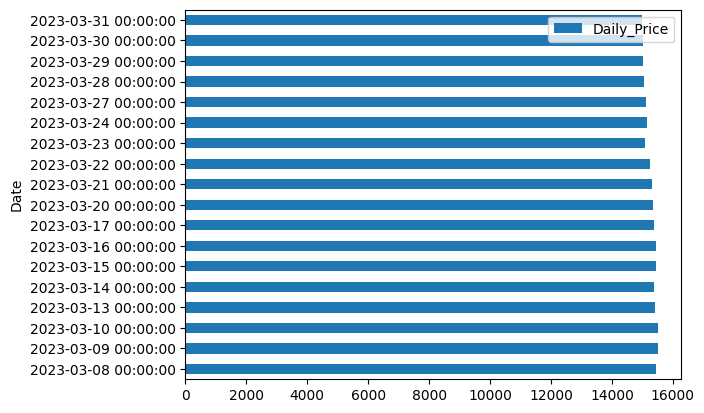

In [175]:
result_march.plot(kind = 'barh')

insight 

- pada bulan maret nilai rupiah tertinggi jatuh pada tanggal 9 maret 2023
- sedangkan ter-rendah pada tanggal 31 maret 2023 

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: ylabel='Date'>

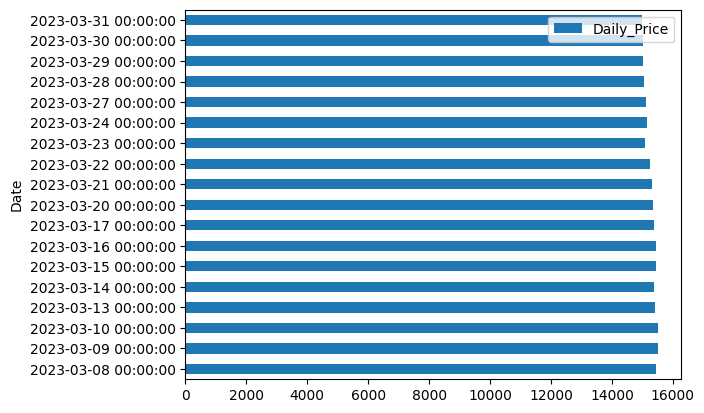

In [184]:
result_march.plot(kind ='barh')

<Axes: ylabel='Date'>

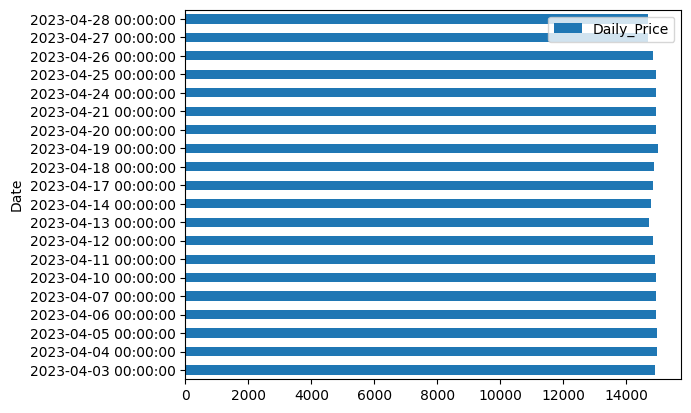

In [185]:
result_april.plot(kind = 'barh')

<Axes: ylabel='Date'>

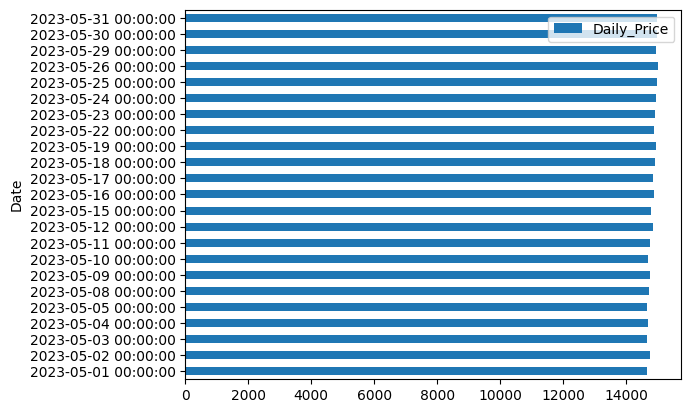

In [186]:
result_may.plot(kind ='barh')

<Axes: ylabel='Date'>

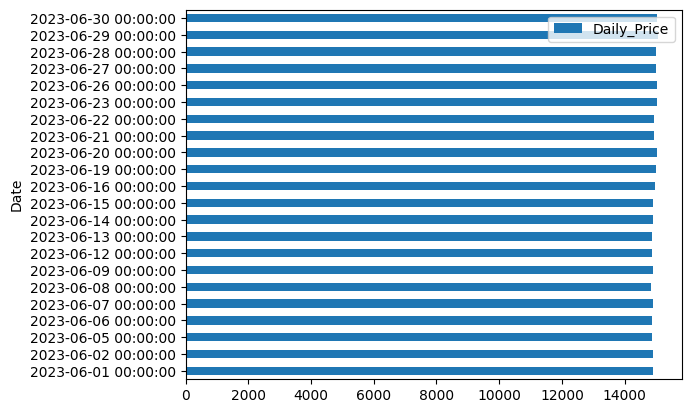

In [190]:
result_june.plot(kind = 'barh')

<Axes: ylabel='Date'>

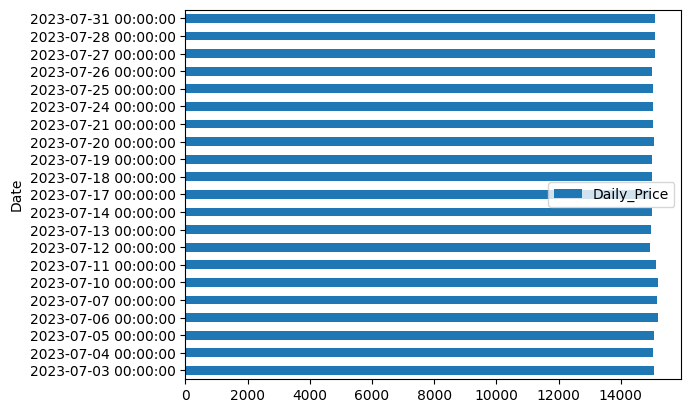

In [191]:
result_july.plot(kind = 'barh')

<Axes: ylabel='Date'>

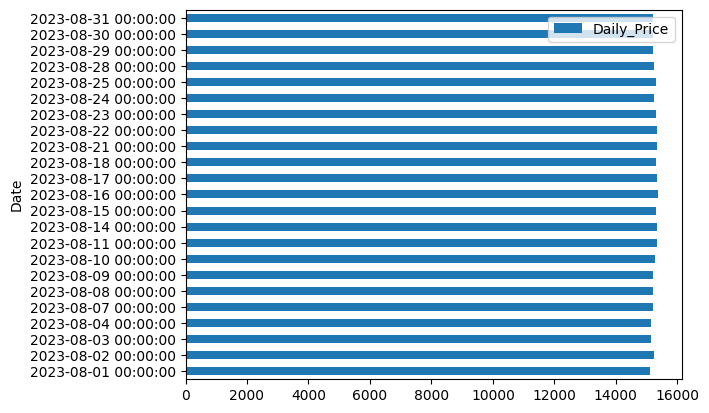

In [192]:
result_august.plot(kind ='barh')

berdasarkan data visualisasi dengan menggunakan plot bar 

- nilai kurs tertinggi jatuh pada bulan agustus karena hampir menyentuh angka 16.000
- dari data diatas tidak ada data bulan yang memiliki nilai fluktuasi yang tinggi,hampir rata rata di setiap  bulannya stabil


### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.